<a href="https://colab.research.google.com/github/mabeto5p/License_plate/blob/main/license_plate_bounding_2_oktober.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/MyDrive/license_plate/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [176]:
from torch.utils.data import *
from imutils import paths
import cv2
import numpy as np
class labelFpsDataLoader(Dataset):
    def __init__(self, img_dir, imgSize, is_transform=None):
        print(img_dir)
        self.img_dir = img_dir
        self.img_paths = []
        print(len(img_dir))
        for i in range(len(img_dir)):
            print(paths.list_images)
            self.img_paths += [el for el in paths.list_images(img_dir[i])]
        print(self.img_paths[0])
        # self.img_paths = os.listdir(img_dir)
        # print self.img_paths
        self.img_size = imgSize
        self.is_transform = is_transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, index):
        # print("________________")
        # print("running get item")
        # print('index', index)
        img_name = self.img_paths[index]
        # print('img_name', img_name)
        # print("________________")
        img = cv2.imread(img_name)

        # img = img.astype('float32')
        resizedImage = cv2.resize(img, self.img_size)
        resizedImage = np.transpose(resizedImage, (2,0,1))
        resizedImage = resizedImage.astype('float32')
        resizedImage /= 255.0
        # lbl = img_name.split('/')[-1].rsplit('.', 1)[0].split('-')[-3]

        iname = img_name.rsplit('/', 1)[-1].rsplit('.', 1)[0].split('-')

        [leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')]
        ori_w, ori_h = [float(int(el)) for el in [img.shape[1], img.shape[0]]]

        scale_x, scale_y = self.img_size[1] / ori_w, self.img_size[0] / ori_h
        print('scales', scale_x, scale_y)

        scaled_leftUp = (int(leftUp[0] * scale_y), int(leftUp[1] * scale_x))
        scaled_rightDown = (int(rightDown[0] * scale_y), int(rightDown[1] * scale_x))


        new_labels = [(leftUp[0] + rightDown[0]) / (2 * ori_w), (leftUp[1] + rightDown[1]) / (2 * ori_h),
                      (rightDown[0] - leftUp[0]) / ori_w, (rightDown[1] - leftUp[1]) / ori_h]

        scaled_labels = [(leftUp[0] / scale_x, leftUp[1] / scale_y), (rightDown[0] / scale_x, rightDown[1] / scale_y)]

        original_labels = [leftUp, rightDown]

        return resizedImage, scaled_labels, img_name, original_labels#lbl, img_name

data_loader = labelFpsDataLoader([data_path],(1000,1000))
trainloader = DataLoader(data_loader, batch_size=1, shuffle=True, num_workers=1)

['/content/gdrive/MyDrive/license_plate/data/']
1
<function list_images at 0x799f912afbe0>
/content/gdrive/MyDrive/license_plate/data/0027-0_0-353&581_433&610-433&609_353&610_353&582_433&581-0_0_32_29_32_30_24-106-39.jpg


scales 1.3888888888888888 0.8620689655172413
length of trainloader_iter 527
scales 1.3888888888888888 0.8620689655172413
scales 1.3888888888888888 scaled_labels [[tensor([217.4400], dtype=torch.float64), tensor([563.7600], dtype=torch.float64)], [tensor([282.2400], dtype=torch.float64), tensor([600.8800], dtype=torch.float64)]]
img_name ('/content/gdrive/MyDrive/license_plate/data/0034-0_3-302&486_392&518-390&518_302&517_304&486_392&487-0_0_10_26_4_25_30-90-18.jpg',)
original_labels [[tensor([302]), tensor([486])], [tensor([392]), tensor([518])]]
original shape (1160, 720, 3)
torch.Size([3, 1000, 1000])
torch.Size([1000, 1000, 3])
0.8620689655172413


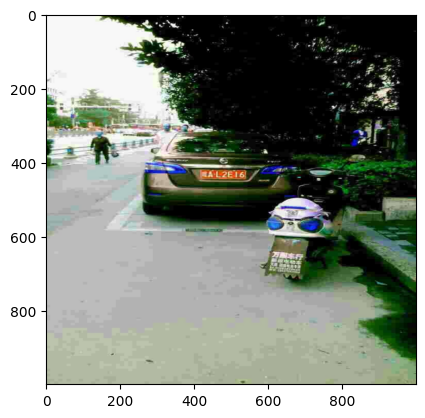

In [177]:
from google.colab.patches import cv2_imshow
trainloader_iter = iter(trainloader)

print('length of trainloader_iter', len(trainloader_iter))
# Get a single batch from the DataLoader

batch = next(trainloader_iter)
print('scaled_labels', batch[1])
print('img_name', batch[2])

img_name = batch[2][0]
print('original_labels', batch[3])





some_img = cv2.imread(img_name)
print('original shape', some_img.shape)

image = batch[0][0]
print(image.shape)
new_image = np.transpose(image, (1,2,0))
print(new_image.shape)
plt.imshow(new_image)



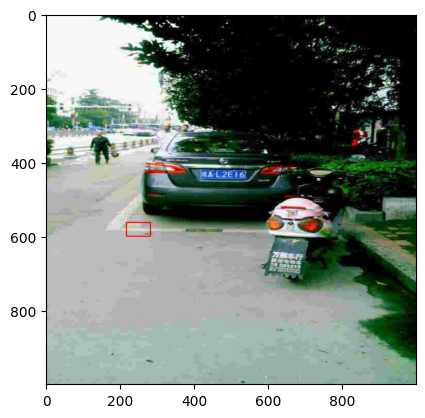

In [178]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Your existing code for numpy_array and cv2_image goes here

numpy_array = new_image.cpu().detach().numpy()
cv2_image = cv2.cvtColor(numpy_array, cv2.COLOR_RGB2BGR)

def plot_img_and_boundingbox(resized_img, leftUp, rightDown):
    # Extract numerical values from tensors and convert to integers
    leftUp = (int(leftUp[0].item()), int(leftUp[1].item()))
    rightDown = (int(rightDown[0].item()), int(rightDown[1].item()))

    # Draw rectangle on the image
    new_image = cv2.rectangle(resized_img, leftUp, rightDown, (255, 0, 0), 2)

    # Display the image
    plt.imshow(new_image)
    plt.show()

# Rest of your code

scaled_labels = batch[1]
leftUp = scaled_labels[0]
rightDown = scaled_labels[1]

plot_img_and_boundingbox(cv2_image, leftUp, rightDown)



In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


from typing import Union



In [13]:
import keras.utils as image_utils

from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import numpy as np



In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

In [67]:
import torch.nn as nn
net = nn.Sequential(
    #AdaptiveAvgPool2d(1),
    nn.Linear(1280, 1024),
    nn.ReLU(),
    nn.Linear(1024, out_features=4, bias=True),
)
model.classifier = net

In [ ]:
model.eval()

In [69]:
layers_of_classifier = 4
for i, param in enumerate(model.parameters()):
    if i < len(list(model.parameters())) - layers_of_classifier:
        param.requires_grad = False
    else:
        param.requires_grad = True

number_of_layers = len(list(enumerate(model.parameters())))
print(f"Total number of layers is {number_of_layers}")
print(f"Number of pretrained base layers is {number_of_layers - layers_of_classifier}")

Total number of layers is 160
Number of pretrained base layers is 156


In [72]:
def check_requires_grad():
  for name, param in model.named_parameters(): # Just to check
    if name.startswith('classifier'):
        print(f'Layer {name} - requires_grad: {param.requires_grad}')
    if name.startswith('features'):
        print(f'Layer {name} - requires_grad: {param.requires_grad}')

# check_requires_grad()

In [74]:
import torch.optim as optim

n_epochs = 10
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
  for X_batch, y_batch in trainloader_iter:
    y_pred = model(X_batch)
    loss = loss_fn(y_pred,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

ValueError: ignored

In [ ]:
train_image1 = image_numpy[0]
train_image1 = np.expand_dims(train_image1, axis=0)
predicted_box = model.predict(train_image1)
predicted_box = predicted_box.astype(int)
plot_img_and_boundingbox(image_numpy[0], predicted_box[0])

val_image1 = validation_images_numpy[0]
val_image1 = np.expand_dims(val_image1, axis=0)
predicted_box = model.predict(val_image1)
predicted_box = predicted_box.astype(int)

plot_img_and_boundingbox(validation_images_numpy[0], predicted_box[0])